In [1]:
from scipy.io import loadmat,savemat
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import os
def remove_zero_rows_cols(matrix):
    # 删除全为0的行
    matrix = matrix[~np.all(matrix == 0, axis=1)]
    # 删除全为0的列
    matrix = matrix[:, ~np.all(matrix == 0, axis=0)]
    return matrix

In [4]:
dGfun={};
dG3d={};
ecG3d={};
ecGfun={};

In [5]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
#font.set_family('serif')  # 设置字体样式为serif
font.set_size(48)  # 设置字体大小为12

In [6]:
datapath = 's:/ptz_spon_alc/spon' 
data = loadmat(os.path.join(datapath, "Ori3dCellTrace.mat"))

In [7]:
nucArea = data['nucArea'] 
trace = data['trace'] 
nucIndex = data['nucIndex']

smallArea = np.squeeze(nucArea <= 4 )
trace = np.delete(trace, np.where(smallArea), axis=0) 
# trace = trace[~smallArea,:]
nucIndex = np.delete(nucIndex, np.where(smallArea))

In [8]:
del(data)

In [9]:
corr1 = squareform(pdist(trace, "correlation"))

In [10]:
nucNo = np.unique(nucIndex) 
neural = np.zeros((len(nucNo), trace.shape[1])) 
for i in range(len(nucNo)): 
    sameNuc = nucIndex == nucNo[i] 
    if np.sum(sameNuc) > 1: 
        neural[i, :] = np.mean(trace[sameNuc, :], axis=0) 
    else: 
        neural[i, :] = trace[sameNuc, :] 
nucIndex = np.arange(len(nucNo)) 

In [11]:
corr2 = squareform(pdist(neural, "correlation"))

In [12]:
corr1=1-corr1;
corr2=1-corr2;
indices = np.diag_indices(corr1.shape[0])
corr1[indices] = 0
indices = np.diag_indices(corr2.shape[0])
corr2[indices] = 0

In [9]:
thresh=0.95;
corr1g=np.zeros(corr1.shape);
corr1g[np.abs(corr1)>thresh]=1;
corr2g=np.zeros(corr2.shape);
corr2g[np.abs(corr2)>thresh]=1;

In [10]:
d1 = np.sum(corr1g,axis=0)
d1 = d1[d1>0]

d2 = np.sum(corr2g,axis=0)
d2 = d2[d2>0]

In [36]:
from powerlaw import plot_ccdf,plot_cdf,plot_pdf,Fit

In [63]:
results=Fit(d2,xmax=500,discrete=True)

Calculating best minimal value for power law fit


In [64]:
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R)
print(p)

1.5025639902639127
136.0
-0.004143338872730773
0.9636110917691643


<Axes: >

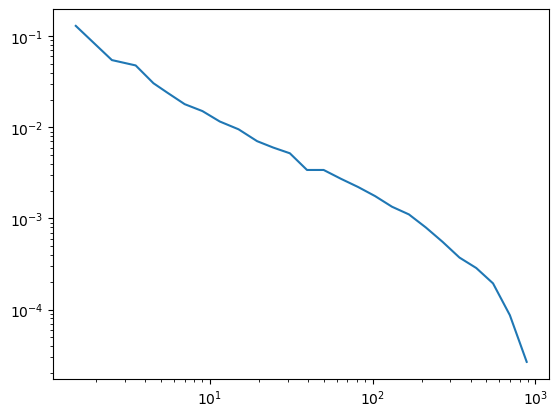

In [48]:
plot_pdf(d2)

分析PTZ的情况

In [13]:
datapath = 's:/ptz_spon_alc/ptz_3' 
data = loadmat(os.path.join(datapath, "Ori3dCellTrace.mat"))

In [14]:
nucArea = data['nucArea'] 
trace = data['trace'] 
nucIndex = data['nucIndex']

smallArea = np.squeeze(nucArea <= 4 )
trace = np.delete(trace, np.where(smallArea), axis=0) 
# trace = trace[~smallArea,:]
nucIndex = np.delete(nucIndex, np.where(smallArea))

In [15]:
del(data)

In [16]:
corr1_p = squareform(pdist(trace, "correlation"))

In [17]:
nucNo = np.unique(nucIndex) 
neural = np.zeros((len(nucNo), trace.shape[1])) 
for i in range(len(nucNo)): 
    sameNuc = nucIndex == nucNo[i] 
    if np.sum(sameNuc) > 1: 
        neural[i, :] = np.mean(trace[sameNuc, :], axis=0) 
    else: 
        neural[i, :] = trace[sameNuc, :] 
nucIndex = np.arange(len(nucNo)) 

In [18]:
corr2_p = squareform(pdist(neural, "correlation"))

In [19]:
corr1_p=1-corr1_p;
corr2_p=1-corr2_p;
indices = np.diag_indices(corr1_p.shape[0])
corr1_p[indices] = 0
indices = np.diag_indices(corr2_p.shape[0])
corr2_p[indices] = 0

In [207]:
thresh=0.9;
corr1g=np.zeros(corr1_p.shape);
corr1g[np.abs(corr1_p)>thresh]=1;
corr2g=np.zeros(corr2_p.shape);
corr2g[np.abs(corr2_p)>thresh]=1;

In [208]:
type='ptz'
G3d = nx.from_numpy_array(remove_zero_rows_cols(corr2g))
Gfunc = nx.from_numpy_array(remove_zero_rows_cols(corr1g))

In [209]:
dGfun[type]=np.array(list(dict(nx.degree(Gfunc)).values()))
dG3d[type]=np.array(list(dict(nx.degree(G3d)).values()))
ecG3d[type] = nx.eigenvector_centrality_numpy(G3d)
ecGfun[type] = nx.eigenvector_centrality_numpy(Gfunc)

d:\ProgramData\Anaconda3\envs\netx\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\Anaconda3\envs\netx\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


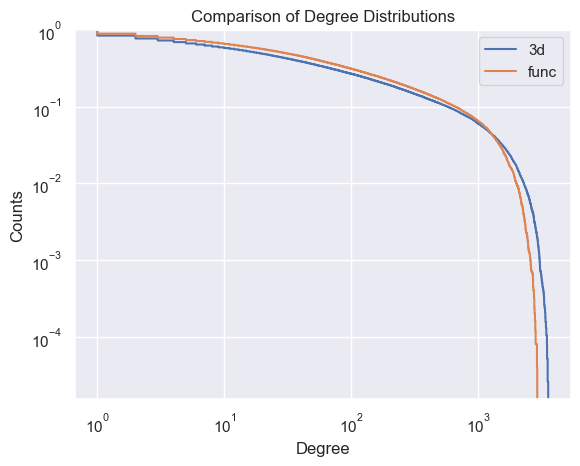

In [210]:
sns.set()
fig, ax = plt.subplots()
sns.ecdfplot(data=dG3d[type][dG3d[type]>0],
             log_scale=True,
             complementary=True,
             label='3d'
            )
sns.ecdfplot(data=dGfun[type][dGfun[type]>0],   
             log_scale=True,
             complementary=True,
             label='func'
            )
plt.title('Comparison of Degree Distributions')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('Counts')

plt.legend()

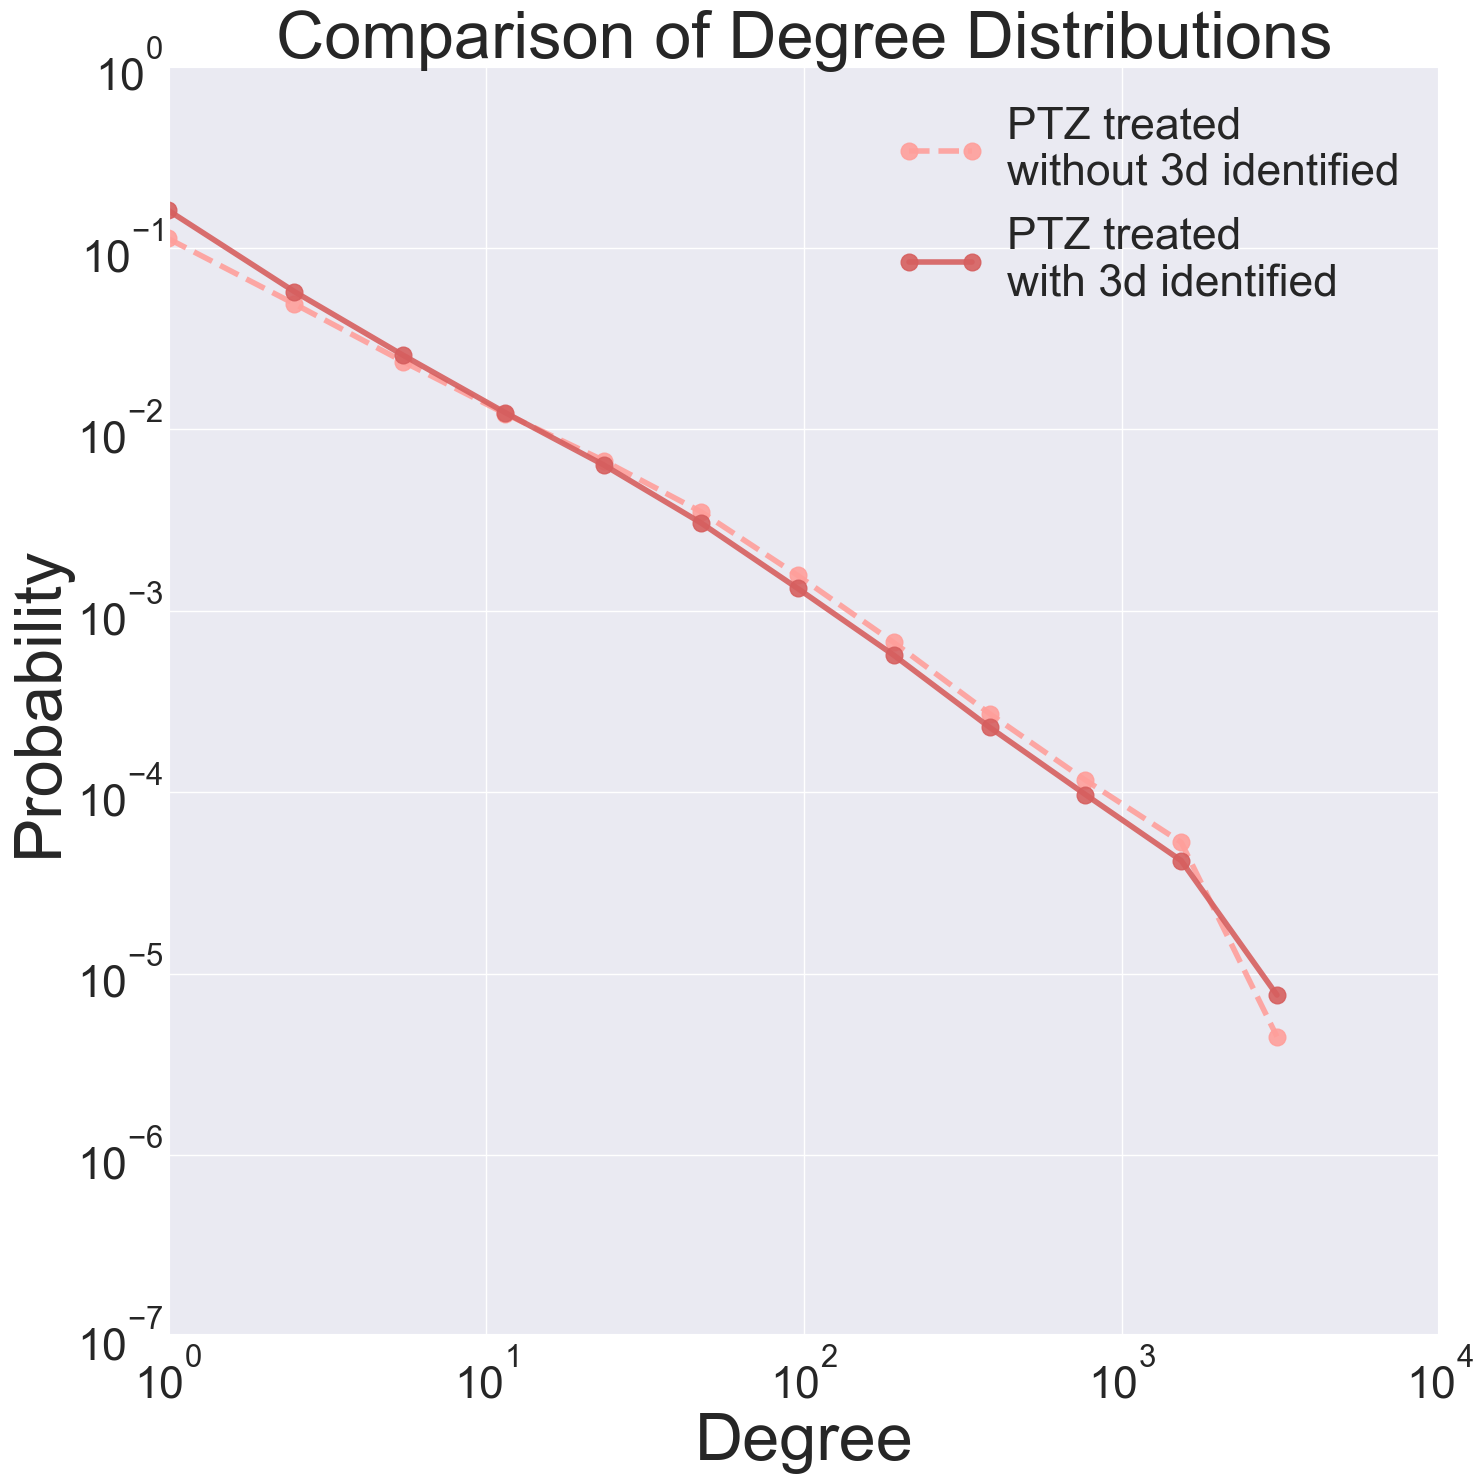

In [222]:
# 计算频率分布 pointplot
#sns.set_theme(style="ticks")
#sns.set_context('paper')
fig, ax = plt.subplots(figsize=(15,15))
cmName1='muted'
cmName2='pastel'

#bins=np.concatenate(([0.5,1.5,2.5,3.5,4.5],np.logspace(np.log10(5.5),4,29)))#np.arange(0.5,1e4+1.5)
bins=np.logspace(0,14,15,base=2)-0.5
x=(bins[:-1]+bins[1:])/2

hist, bins = np.histogram(dGfun['ptz'][dGfun['ptz']>0], bins=bins, density=True);
plt.plot(x[hist>0],hist[hist>0],'o-',
             markersize='12',
             color=sns.color_palette(cmName2)[3],
             label='PTZ treated \nwithout 3d identified'
            )
hist, bins = np.histogram(dG3d['ptz'][dG3d['ptz']>0], bins=bins, density=True);
plt.plot(x[hist>0],hist[hist>0],'o-',
             markersize='12',
             color=sns.color_palette(cmName1)[3],
             label='PTZ treated \nwith 3d identified'
            )

ax.lines[0].set(linewidth=4, linestyle='--', alpha=0.9)
ax.lines[1].set(linewidth=4, linestyle='-', alpha=0.9)

plt.title('Comparison of Degree Distributions',fontproperties=font);
ax.set_xlim([1,1e4])
ax.set_ylim([1e-7,10**(-0)])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Degree',fontproperties=font);
ax.set_ylabel('Probability',fontproperties=font);
#ax.set_aspect('equal', adjustable='datalim')

plt.legend(fontsize=32,
           handletextpad=0.5,
           numpoints=2,
          frameon=False)
plt.tick_params(axis='x', which='major',direction='in',length=18 ,labelsize=32,pad=9)
plt.tick_params(axis='x', which='minor',direction='in',length=9)
plt.tick_params(axis='y', which='major',direction='in',length=18 ,labelsize=32)
plt.tick_params(axis='y', which='minor',direction='in',length=9)

ax.spines['left'].set_linewidth(3)   # 左边坐标轴
ax.spines['bottom'].set_linewidth(3) # 底部坐标轴
ax.spines['right'].set_linewidth(3)  # 右边坐标轴
ax.spines['top'].set_linewidth(3)    # 顶部坐标轴

plt.tight_layout()
#plt.savefig('度分布比较_point.png')

In [211]:
d1 = np.sum(corr1g,axis=0)
d1 = d1[d1>0]

d2 = np.sum(corr2g,axis=0)
d2 = d2[d2>0]

In [212]:
del(corr1g)
del(corr2g)

In [24]:
from powerlaw import plot_ccdf,plot_cdf,plot_pdf,Fit

In [226]:
results1=Fit(d1,
             xmax=d1.max()*2,
             discrete=True)
results2=Fit(d2,
             xmax=d2.max()*2,
             discrete=True)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [150]:
results1=Fit(d1,xmax=1000,discrete=True)
results2=Fit(d2,xmax=1000,discrete=True)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [219]:
print(results1.power_law.alpha)
print(results1.power_law.xmin)
print(results1.power_law.xmax)
R, p = results.distribution_compare('power_law', 'exponential')
#R, p = results.distribution_compare('power_law', 'lognormal')
print(R)
print(p)

1.2598049410383516
19.0
3573.0
2774.2849515817047
9.606137395150921e-211


<Axes: >

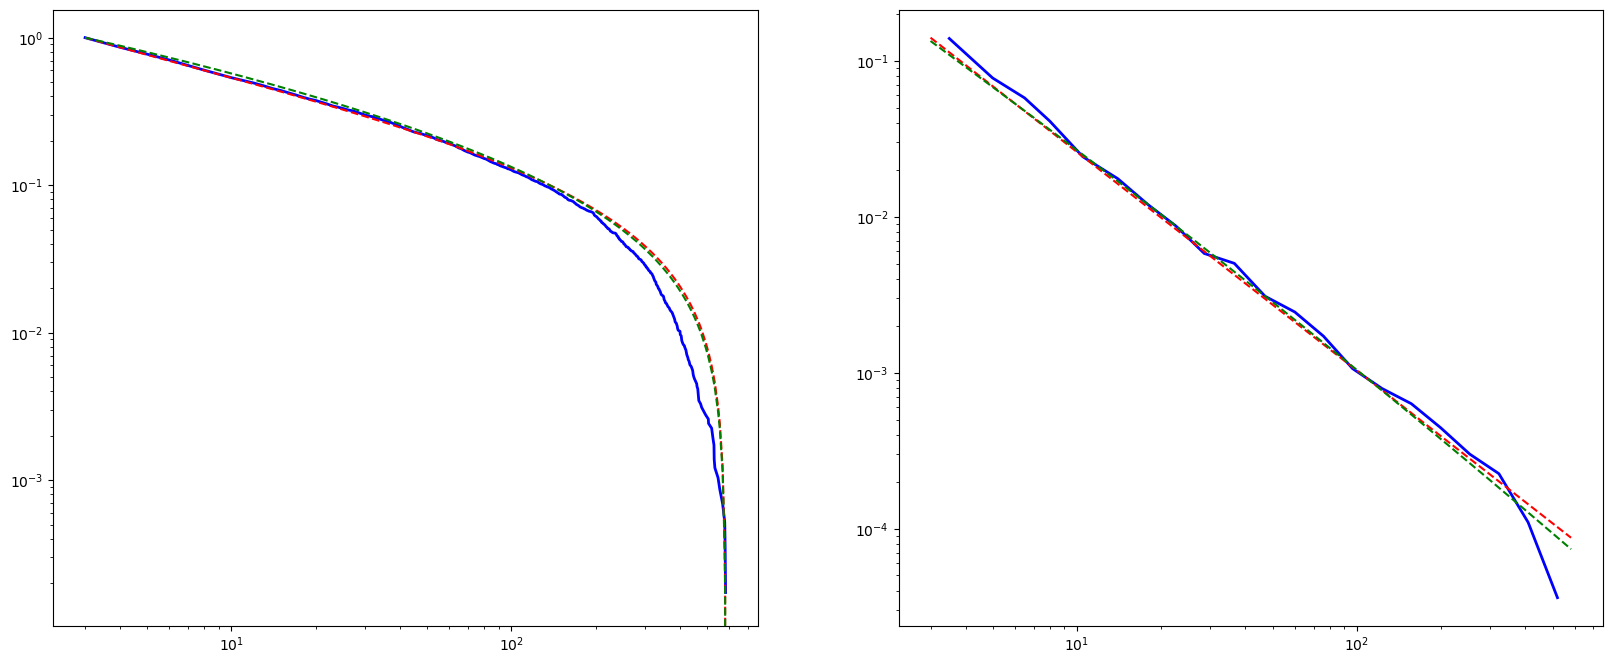

In [160]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
results.plot_ccdf(color = 'b', linewidth = 2, ax = ax1)
results.power_law.plot_ccdf(color = 'r', linestyle = '--', ax = ax1)
results.lognormal.plot_ccdf(color = 'g', linestyle = '--', ax = ax1)

results.plot_pdf(color = 'b', linewidth = 2, ax = ax2)
results.power_law.plot_pdf(color = 'r', linestyle = '--', ax = ax2)
results.lognormal.plot_pdf(color = 'g', linestyle = '--', ax = ax2)

<Axes: >

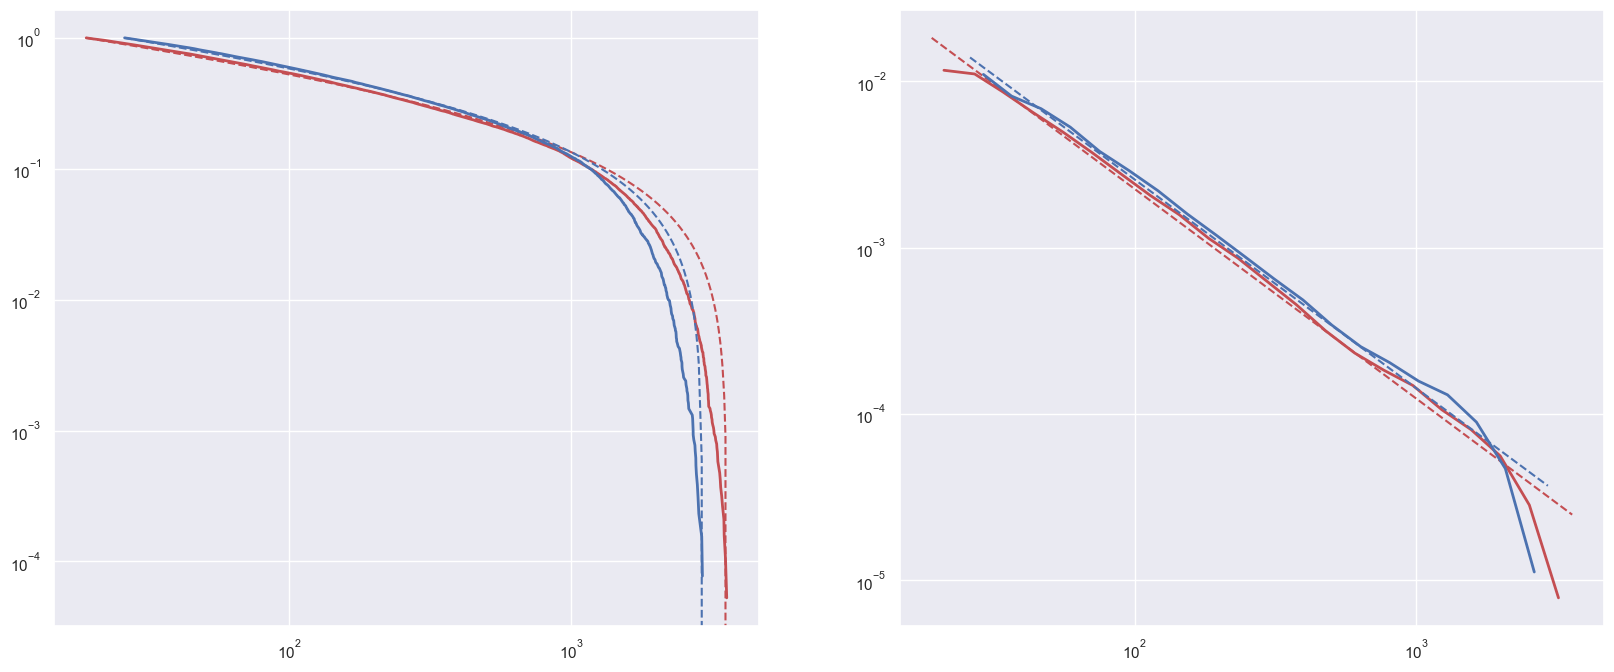

In [220]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))

results1.plot_ccdf(color = 'r', linewidth = 2, ax = ax1)
results1.power_law.plot_ccdf(color = 'r', linestyle = '--', ax = ax1)
results2.plot_ccdf(color = 'b', linewidth = 2, ax = ax1)
results2.power_law.plot_ccdf(color = 'b', linestyle = '--', ax = ax1)

results1.plot_pdf(color = 'r', linewidth = 2, ax = ax2)
results1.power_law.plot_pdf(color = 'r', linestyle = '--', ax = ax2)
results2.plot_pdf(color = 'b', linewidth = 2, ax = ax2)
results2.power_law.plot_pdf(color = 'b', linestyle = '--', ax = ax2)

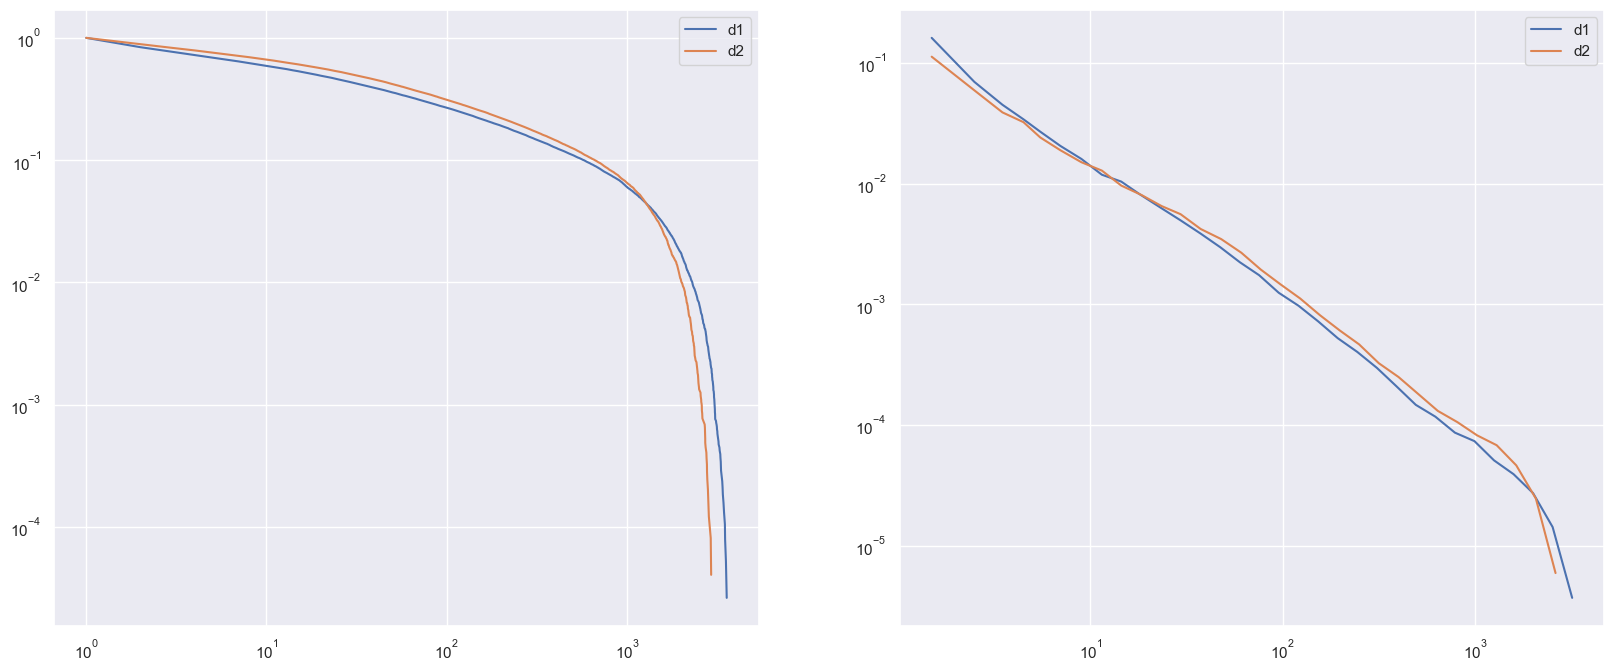

In [225]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
plot_ccdf(d1,ax=ax1,label='d1')
plot_ccdf(d2,ax=ax1,label='d2')
plot_pdf(d1,ax=ax2,label='d1')
plot_pdf(d2,ax=ax2,label='d2')
ax1.legend()
ax2.legend()

d:\ProgramData\Anaconda3\envs\netx\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\Anaconda3\envs\netx\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\Anaconda3\envs\netx\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\Anaconda3\envs\netx\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

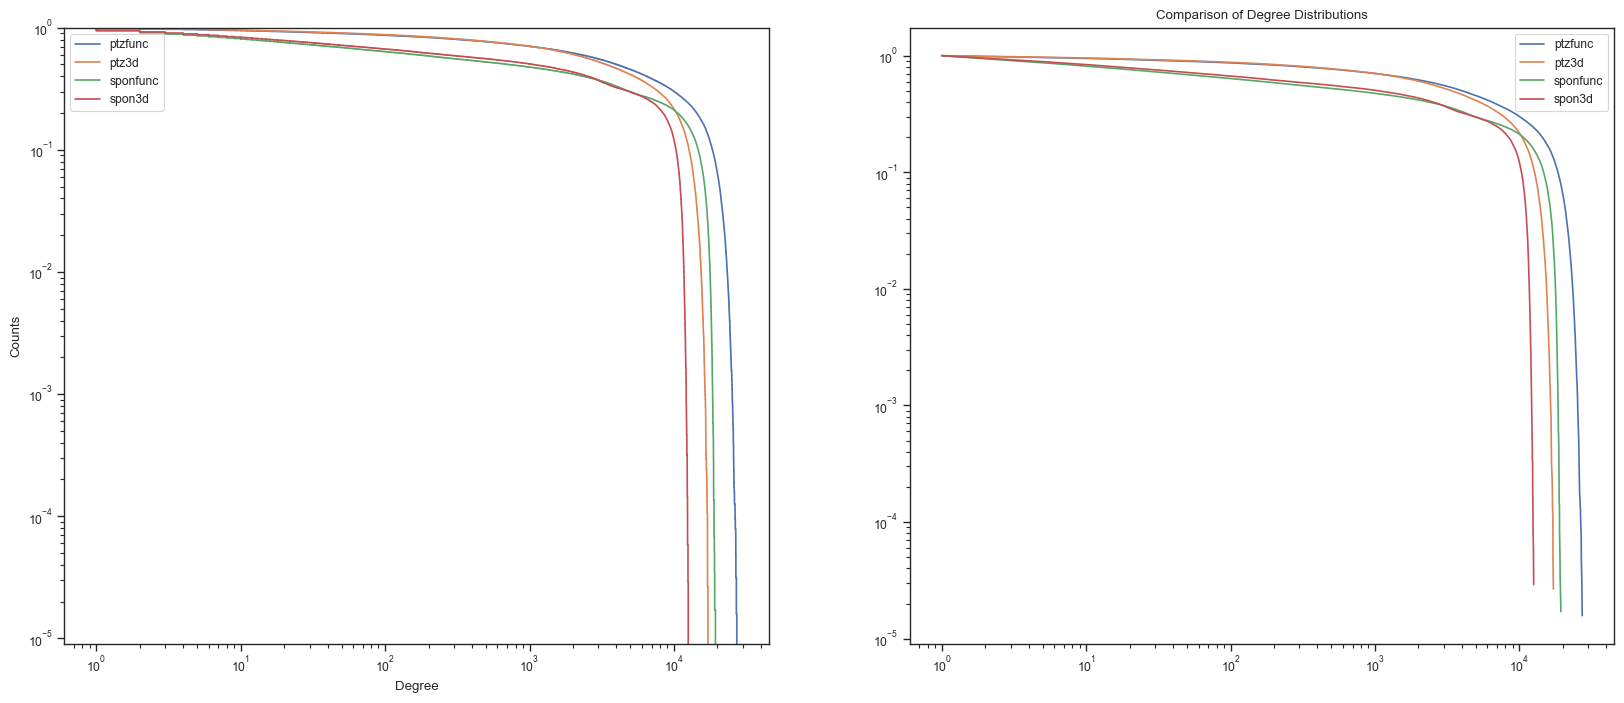

In [26]:
thresh=0.7;

type='ptz'

corr1g=np.zeros(corr1_p.shape);
corr1g[np.abs(corr1_p)>thresh]=1;
corr2g=np.zeros(corr2_p.shape);
corr2g[np.abs(corr2_p)>thresh]=1;

G3d = nx.from_numpy_array(remove_zero_rows_cols(corr2g))
Gfunc = nx.from_numpy_array(remove_zero_rows_cols(corr1g))

dGfun[type]=np.array(list(dict(nx.degree(Gfunc)).values()))
dG3d[type]=np.array(list(dict(nx.degree(G3d)).values()))
#ecG3d[type] = nx.eigenvector_centrality_numpy(G3d)
#ecGfun[type] = nx.eigenvector_centrality_numpy(Gfunc)

d1 = np.sum(corr1g,axis=0)
d1 = d1[d1>0]

d2 = np.sum(corr2g,axis=0)
d2 = d2[d2>0]

#sns.set()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
sns.ecdfplot(data=dGfun[type][dGfun[type]>0],   
             log_scale=True,
             complementary=True,
             label=type+'func',
             ax = ax1
            )
sns.ecdfplot(data=dG3d[type][dG3d[type]>0],
             log_scale=True,
             complementary=True,
             label=type+'3d',
             ax = ax1
            )
plt.title('Comparison of Degree Distributions')
ax1.set_yscale('log')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Counts')
ax1.legend()

plot_ccdf(d1,ax=ax2,label=type+'func')
plot_ccdf(d2,ax=ax2,label=type+'3d')
ax2.legend()

type='spon'

corr1g=np.zeros(corr1.shape);
corr1g[np.abs(corr1)>thresh]=1;
corr2g=np.zeros(corr2.shape);
corr2g[np.abs(corr2)>thresh]=1;

G3d = nx.from_numpy_array(remove_zero_rows_cols(corr2g))
Gfunc = nx.from_numpy_array(remove_zero_rows_cols(corr1g))

dGfun[type]=np.array(list(dict(nx.degree(Gfunc)).values()))
dG3d[type]=np.array(list(dict(nx.degree(G3d)).values()))
#ecG3d[type] = nx.eigenvector_centrality_numpy(G3d)
#ecGfun[type] = nx.eigenvector_centrality_numpy(Gfunc)

d1 = np.sum(corr1g,axis=0)
d1 = d1[d1>0]

d2 = np.sum(corr2g,axis=0)
d2 = d2[d2>0]

#sns.set()
#fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 8))
sns.ecdfplot(data=dGfun[type][dGfun[type]>0],   
             log_scale=True,
             complementary=True,
             label=type+'func',
             ax = ax1
            )
sns.ecdfplot(data=dG3d[type][dG3d[type]>0],
             log_scale=True,
             complementary=True,
             label=type+'3d',
             ax = ax1
            )
plt.title('Comparison of Degree Distributions')
ax1.set_yscale('log')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Counts')
ax1.legend()

plot_ccdf(d1,ax=ax2,label=type+'func')
plot_ccdf(d2,ax=ax2,label=type+'3d')
ax2.legend()

del(corr1g)
del(corr2g)

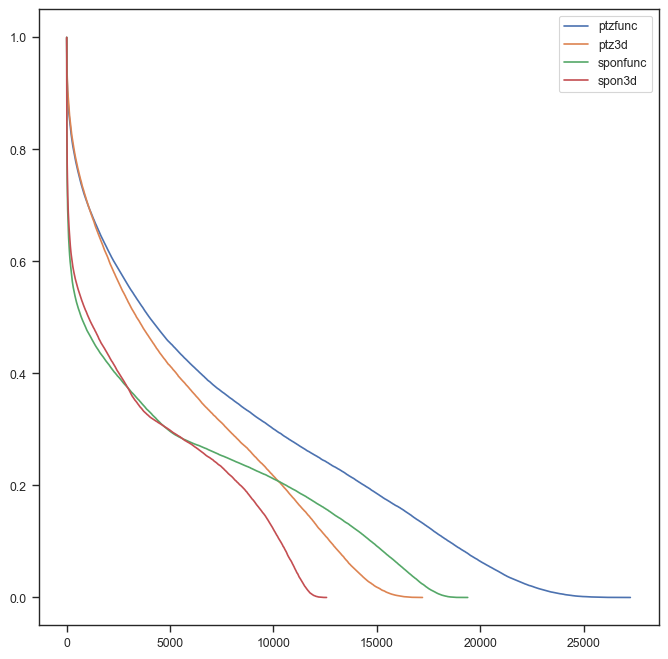

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

type='ptz'
d1 = dGfun[type]
d1 = d1[d1>0]
d2 = dG3d[type]
d2 = d2[d2>0]
plot_ccdf(d1,ax=ax,label=type+'func')
plot_ccdf(d2,ax=ax,label=type+'3d')

type='spon'
d1 = dGfun[type]
d1 = d1[d1>0]
d2 = dG3d[type]
d2 = d2[d2>0]
plot_ccdf(d1,ax=ax,label=type+'func')
plot_ccdf(d2,ax=ax,label=type+'3d')

ax.legend()
ax.set_xscale('linear')
ax.set_yscale('linear')

In [20]:
thresh=0.8;

type='ptz'

corr1g=np.zeros(corr1_p.shape);
corr1g[np.abs(corr1_p)>thresh]=1;
corr2g=np.zeros(corr2_p.shape);
corr2g[np.abs(corr2_p)>thresh]=1;

G3d = nx.from_numpy_array(remove_zero_rows_cols(corr2g))
Gfunc = nx.from_numpy_array(remove_zero_rows_cols(corr1g))

#dGfun[type]=np.array(list(dict(nx.degree(Gfunc)).values()))
#dG3d[type]=np.array(list(dict(nx.degree(G3d)).values()))
ecG3d[type] = nx.eigenvector_centrality_numpy(G3d)
ecGfun[type] = nx.eigenvector_centrality_numpy(Gfunc)

type='spon'

corr1g=np.zeros(corr1.shape);
corr1g[np.abs(corr1)>thresh]=1;
corr2g=np.zeros(corr2.shape);
corr2g[np.abs(corr2)>thresh]=1;

G3d = nx.from_numpy_array(remove_zero_rows_cols(corr2g))
Gfunc = nx.from_numpy_array(remove_zero_rows_cols(corr1g))

ecG3d[type] = nx.eigenvector_centrality_numpy(G3d)
ecGfun[type] = nx.eigenvector_centrality_numpy(Gfunc)

del(corr1g)
del(corr2g)

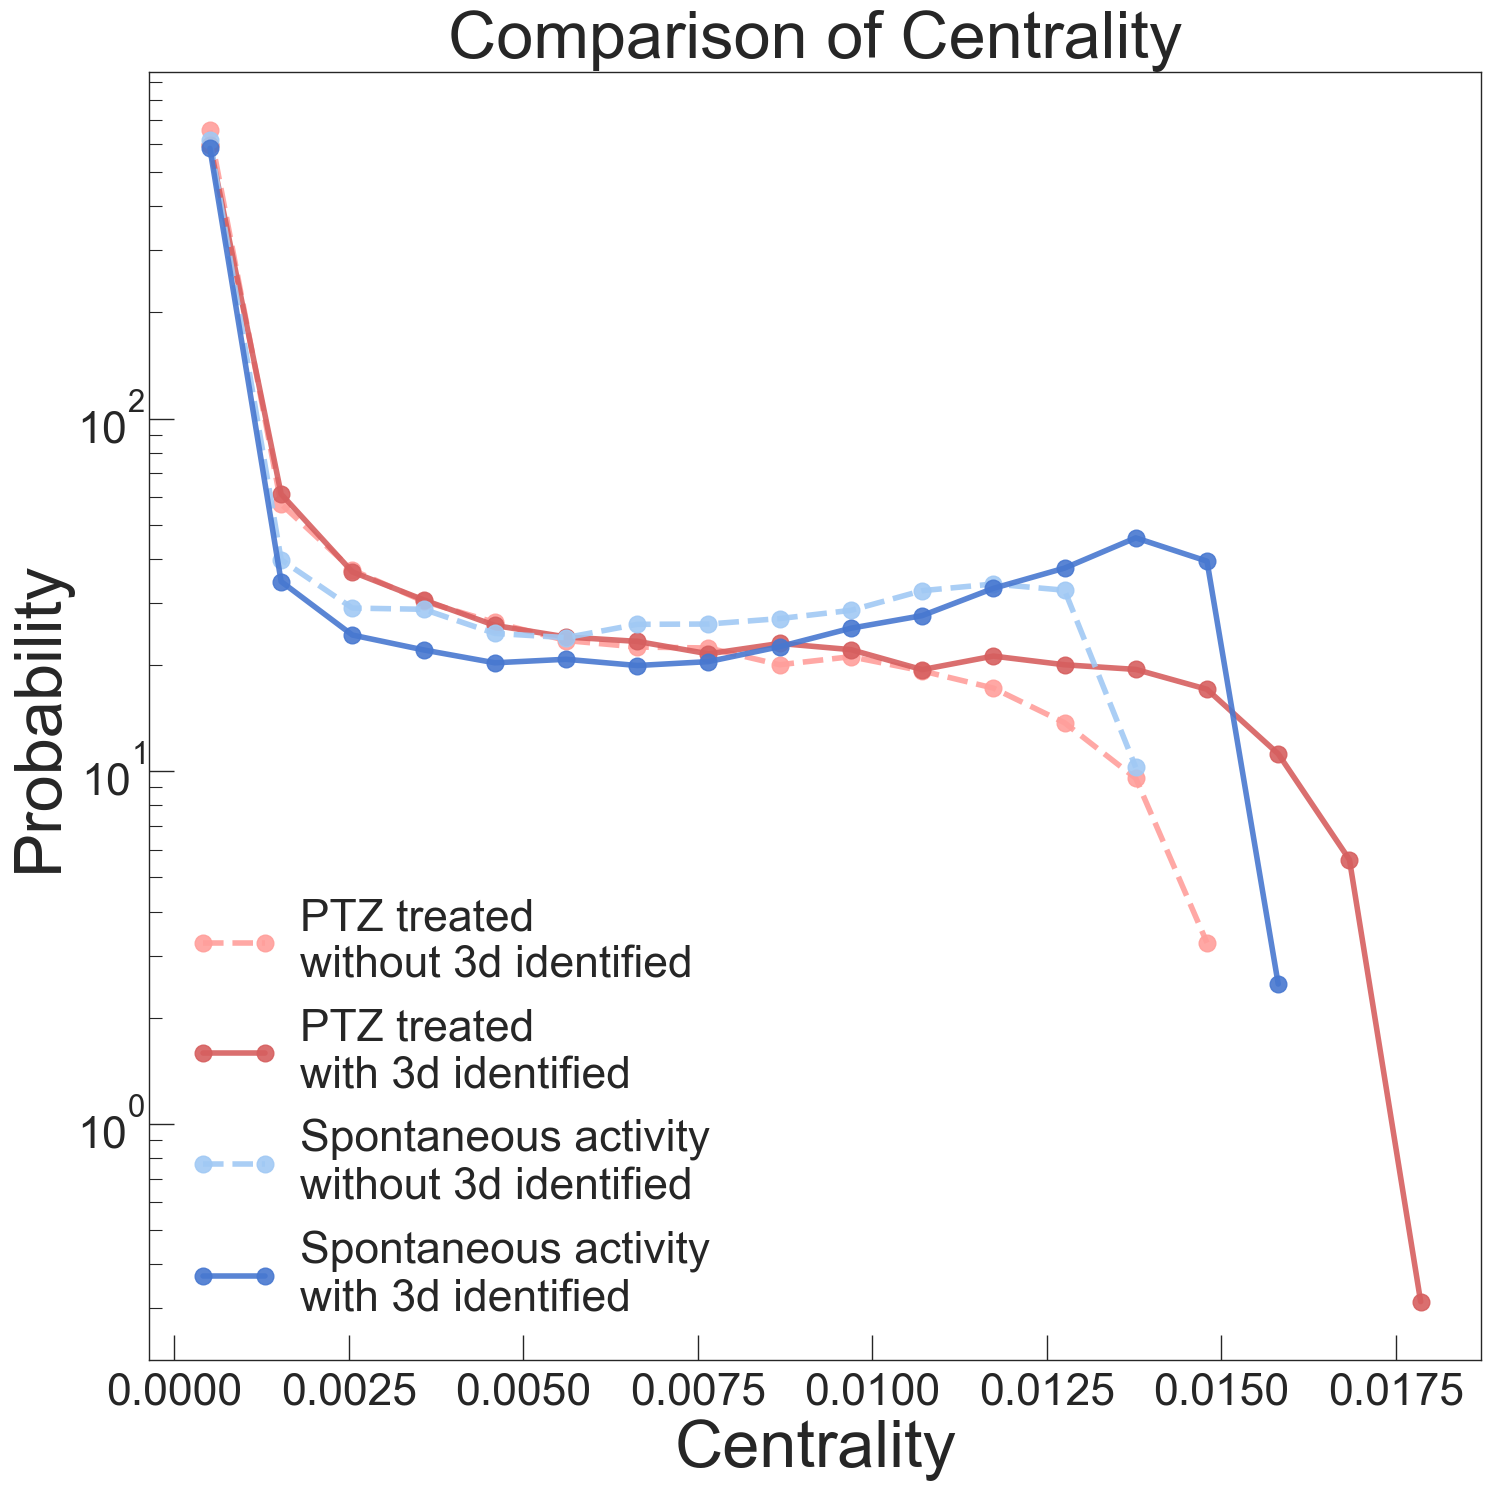

In [21]:
cmName1='muted'
cmName2='pastel'
#合并画度中心性分布
bins = np.linspace(0,0.05,50)
sns.set_theme(style="ticks")
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(15, 15))
x=(bins[:-1]+bins[1:])/2

centrality=ecGfun['ptz']
hist, bins = np.histogram(np.array(list(centrality.values())), bins=bins, density=True);
plt.plot(x[hist>0],hist[hist>0],'o-',
             markersize='12',
             color=sns.color_palette(cmName2)[3],
             label='PTZ treated \nwithout 3d identified'
            )
centrality=ecG3d['ptz']
hist, bins = np.histogram(np.array(list(centrality.values())), bins=bins, density=True);
plt.plot(x[hist>0],hist[hist>0],'o-',
             markersize='12',
             color=sns.color_palette(cmName1)[3],
             label='PTZ treated \nwith 3d identified'
            )
centrality=ecGfun['spon']
hist, bins = np.histogram(np.array(list(centrality.values())), bins=bins, density=True);
plt.plot(x[hist>0],hist[hist>0],'o-',
         markersize='12',
             color=sns.color_palette(cmName2)[0],
             label='Spontaneous activity \nwithout 3d identified'
            )
centrality=ecG3d['spon']
hist, bins = np.histogram(np.array(list(centrality.values())), bins=bins, density=True);
plt.plot(x[hist>0],hist[hist>0],'o-',
         markersize='12',
             color=sns.color_palette(cmName1)[0],
             label='Spontaneous activity \nwith 3d identified'
            )

ax.lines[0].set(linewidth=4, linestyle='--', alpha=0.9)
ax.lines[1].set(linewidth=4, linestyle='-', alpha=0.9)
ax.lines[2].set(linewidth=4, linestyle='--', alpha=0.9)
ax.lines[3].set(linewidth=4, linestyle='-', alpha=0.9)
plt.title('Comparison of Centrality',fontproperties=font);
#ax.set_xlim([1,1e4])
#ax.set_ylim([1e-7,10**(-0.5)])
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Centrality',fontproperties=font);
ax.set_ylabel('Probability',fontproperties=font);
#ax.set_aspect('equal', adjustable='datalim')

plt.legend(fontsize=32,
           handletextpad=0.5,
           numpoints=2,
          frameon=False)
plt.tick_params(axis='x', which='major',direction='in',length=18 ,labelsize=32,pad=9)
plt.tick_params(axis='x', which='minor',direction='in',length=9)
plt.tick_params(axis='y', which='major',direction='in',length=18 ,labelsize=32)
plt.tick_params(axis='y', which='minor',direction='in',length=9)

plt.tight_layout()
#plt.savefig('中心性比较_point.pdf')

In [ ]:
import pandas as pd

maxn=80;

# 创建DataFrame对象

# 创建一个空的DataFrame
df = pd.DataFrame(columns=['Centrality', 'exp', 'treat'])

data = np.sort(np.array(list(ecG3d['ptz'].values())))[-maxn:-1];
for i in data:
# 创建新的数据行
    new_row = pd.Series([i, 'PTZ', 'With 3d identified'], index=['Centrality', 'exp', 'treat'])
# 追加新的数据行到DataFrame中
    #df = df.append(new_row, ignore_index=True)
    df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

data = np.sort(np.array(list(ecGfun['ptz'].values())))[-maxn:-1];
for i in data:
# 创建新的数据行
    new_row = pd.Series([i, 'PTZ', 'Without 3d identified'], index=['Centrality', 'exp', 'treat'])
# 追加新的数据行到DataFrame中
    #df = df.append(new_row, ignore_index=True)
    df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
    
data = np.sort(np.array(list(ecG3d['spon'].values())))[-maxn:-1];
for i in data:
# 创建新的数据行
    new_row = pd.Series([i, 'Spontaneous', 'With 3d identified'], index=['Centrality', 'exp', 'treat'])
# 追加新的数据行到DataFrame中
    #df = df.append(new_row, ignore_index=True)
    df = pd.concat([df, new_row.to_frame().T], ignore_index=True)

data = np.sort(np.array(list(ecGfun['spon'].values())))[-maxn:-1];
for i in data:
# 创建新的数据行
    new_row = pd.Series([i, 'Spontaneous', 'Without 3d identified'], index=['Centrality', 'exp', 'treat'])
# 追加新的数据行到DataFrame中
    #df = df.append(new_row, ignore_index=True)
    df = pd.concat([df, new_row.to_frame().T], ignore_index=True)    

# 绘制swarmplot
sns.set_theme(style="ticks")
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(15, 7))
palette = sns.color_palette([sns.color_palette(cmName1)[3],sns.color_palette(cmName1)[0]])
sns.swarmplot(df,x='Centrality', y='treat',hue='exp',dodge=True, palette=palette)

ax.set_xlabel('Centrality',fontproperties=font);
#ax.set_aspect('equal', adjustable='datalim')

plt.legend(fontsize=32,
           handletextpad=0,
           #scatterpoints=9,
           markerscale=2,
           frameon=False)
plt.tick_params(axis='x', which='major',direction='in',length=18 ,labelsize=32,pad=9)
plt.tick_params(axis='y', which='major',labelsize=32)

ax.spines['left'].set_linewidth(3)   # 左边坐标轴
ax.spines['bottom'].set_linewidth(3) # 底部坐标轴
ax.spines['right'].set_linewidth(3)  # 右边坐标轴
ax.spines['top'].set_linewidth(3)    # 顶部坐标轴

plt.tight_layout()
plt.savefig('中心性比较_swarm.png')

In [ ]:
thresh=0.8;

type='ptz'

corr1g=np.zeros(corr1_p.shape);
corr1g[np.abs(corr1_p)>thresh]=1;
corr2g=np.zeros(corr2_p.shape);
corr2g[np.abs(corr2_p)>thresh]=1;

G3d = nx.from_numpy_array(remove_zero_rows_cols(corr2g))
Gfunc = nx.from_numpy_array(remove_zero_rows_cols(corr1g))

#dGfun[type]=np.array(list(dict(nx.degree(Gfunc)).values()))
#dG3d[type]=np.array(list(dict(nx.degree(G3d)).values()))
clusteringG3d[type] = nx.clustering(G3d)
clusteringGfun[type] = nx.clustering(Gfunc)

type='spon'

corr1g=np.zeros(corr1.shape);
corr1g[np.abs(corr1)>thresh]=1;
corr2g=np.zeros(corr2.shape);
corr2g[np.abs(corr2)>thresh]=1;

G3d = nx.from_numpy_array(remove_zero_rows_cols(corr2g))
Gfunc = nx.from_numpy_array(remove_zero_rows_cols(corr1g))

clusteringG3d[type] = nx.clustering(G3d)
clusteringGfun[type] = nx.clustering(Gfunc)

del(corr1g)
del(corr2g)